In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
#https://www.kaggle.com/code/abhi0612/mtcars-dataset-k-means-clusteringea/notebook

df=pd.read_csv('cars.csv')
df.head()

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [12]:
df.shape

(32, 12)

<AxesSubplot:>

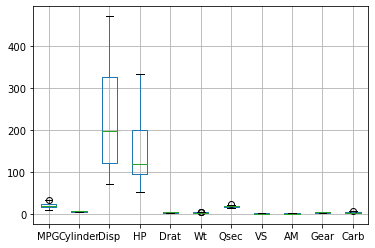

In [5]:
df.boxplot()

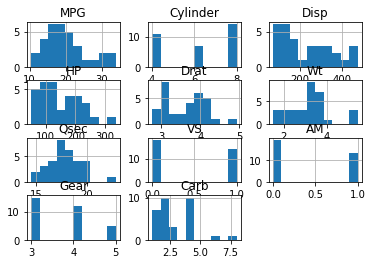

In [9]:
df.hist()
plt.show()

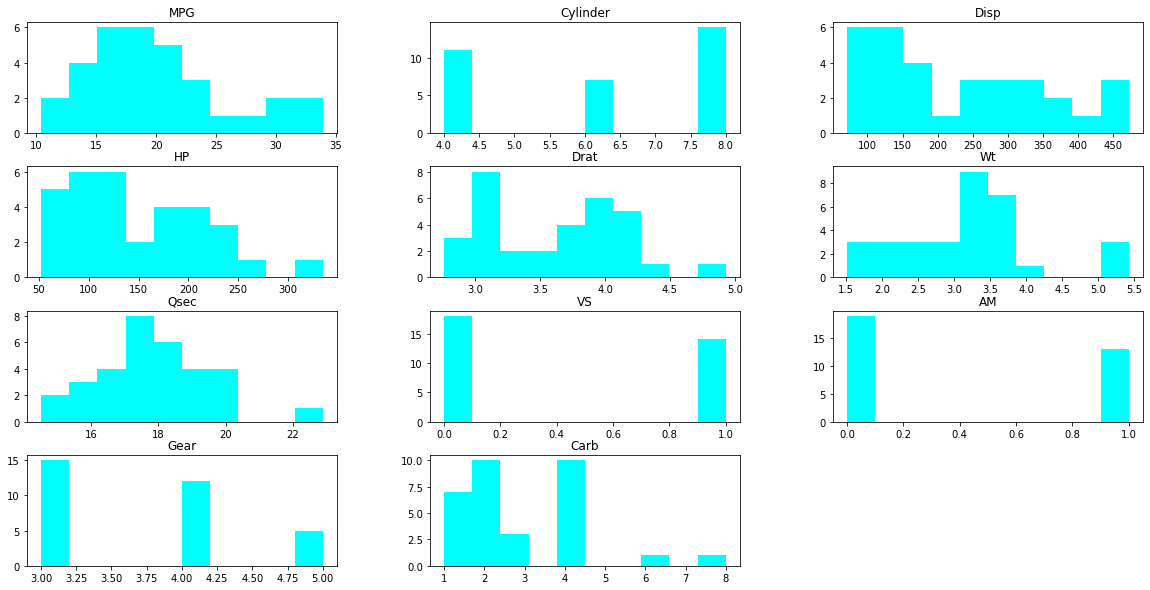

In [19]:

df.hist(grid=False, figsize=(20,10), color='cyan')
plt.show()

In [15]:
df.dtypes

Model        object
MPG         float64
Cylinder      int64
Disp        float64
HP            int64
Drat        float64
Wt          float64
Qsec        float64
VS            int64
AM            int64
Gear          int64
Carb          int64
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Model     32 non-null     object 
 1   MPG       32 non-null     float64
 2   Cylinder  32 non-null     int64  
 3   Disp      32 non-null     float64
 4   HP        32 non-null     int64  
 5   Drat      32 non-null     float64
 6   Wt        32 non-null     float64
 7   Qsec      32 non-null     float64
 8   VS        32 non-null     int64  
 9   AM        32 non-null     int64  
 10  Gear      32 non-null     int64  
 11  Carb      32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [17]:
df.isnull().sum()

Model       0
MPG         0
Cylinder    0
Disp        0
HP          0
Drat        0
Wt          0
Qsec        0
VS          0
AM          0
Gear        0
Carb        0
dtype: int64

In [20]:
df.corr()

,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
MPG,1.000000,-0.852162,-0.847011,-0.774015,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
Cylinder,-0.852162,1.000000,0.900024,0.839705,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
Disp,-0.847011,0.900024,1.000000,0.787226,-0.707880,0.887034,-0.433543,-0.708249,-0.589782,-0.553274,0.395375
HP,-0.774015,0.839705,0.787226,1.000000,-0.468566,0.655475,-0.696349,-0.739949,-0.248297,-0.149057,0.729171
Drat,0.681172,-0.699938,-0.707880,-0.468566,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
Wt,-0.867659,0.782496,0.887034,0.655475,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
Qsec,0.418684,-0.591242,-0.433543,-0.696349,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
VS,0.664039,-0.810812,-0.708249,-0.739949,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
AM,0.599832,-0.522607,-0.589782,-0.248297,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
Gear,0.480285,-0.492687,-0.553274,-0.149057,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


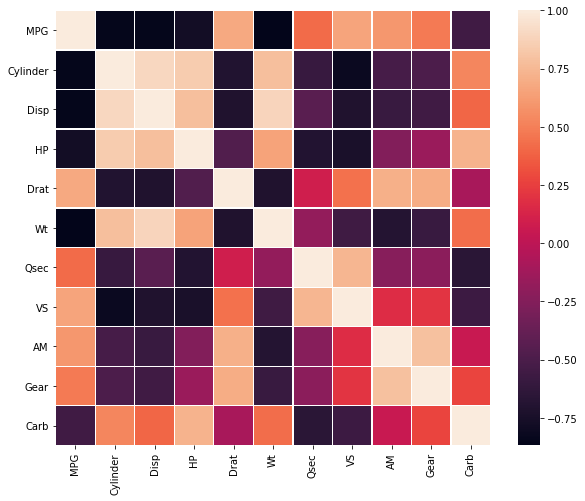

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), square=True, linewidths=0.2)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

<Figure size 1440x720 with 0 Axes>

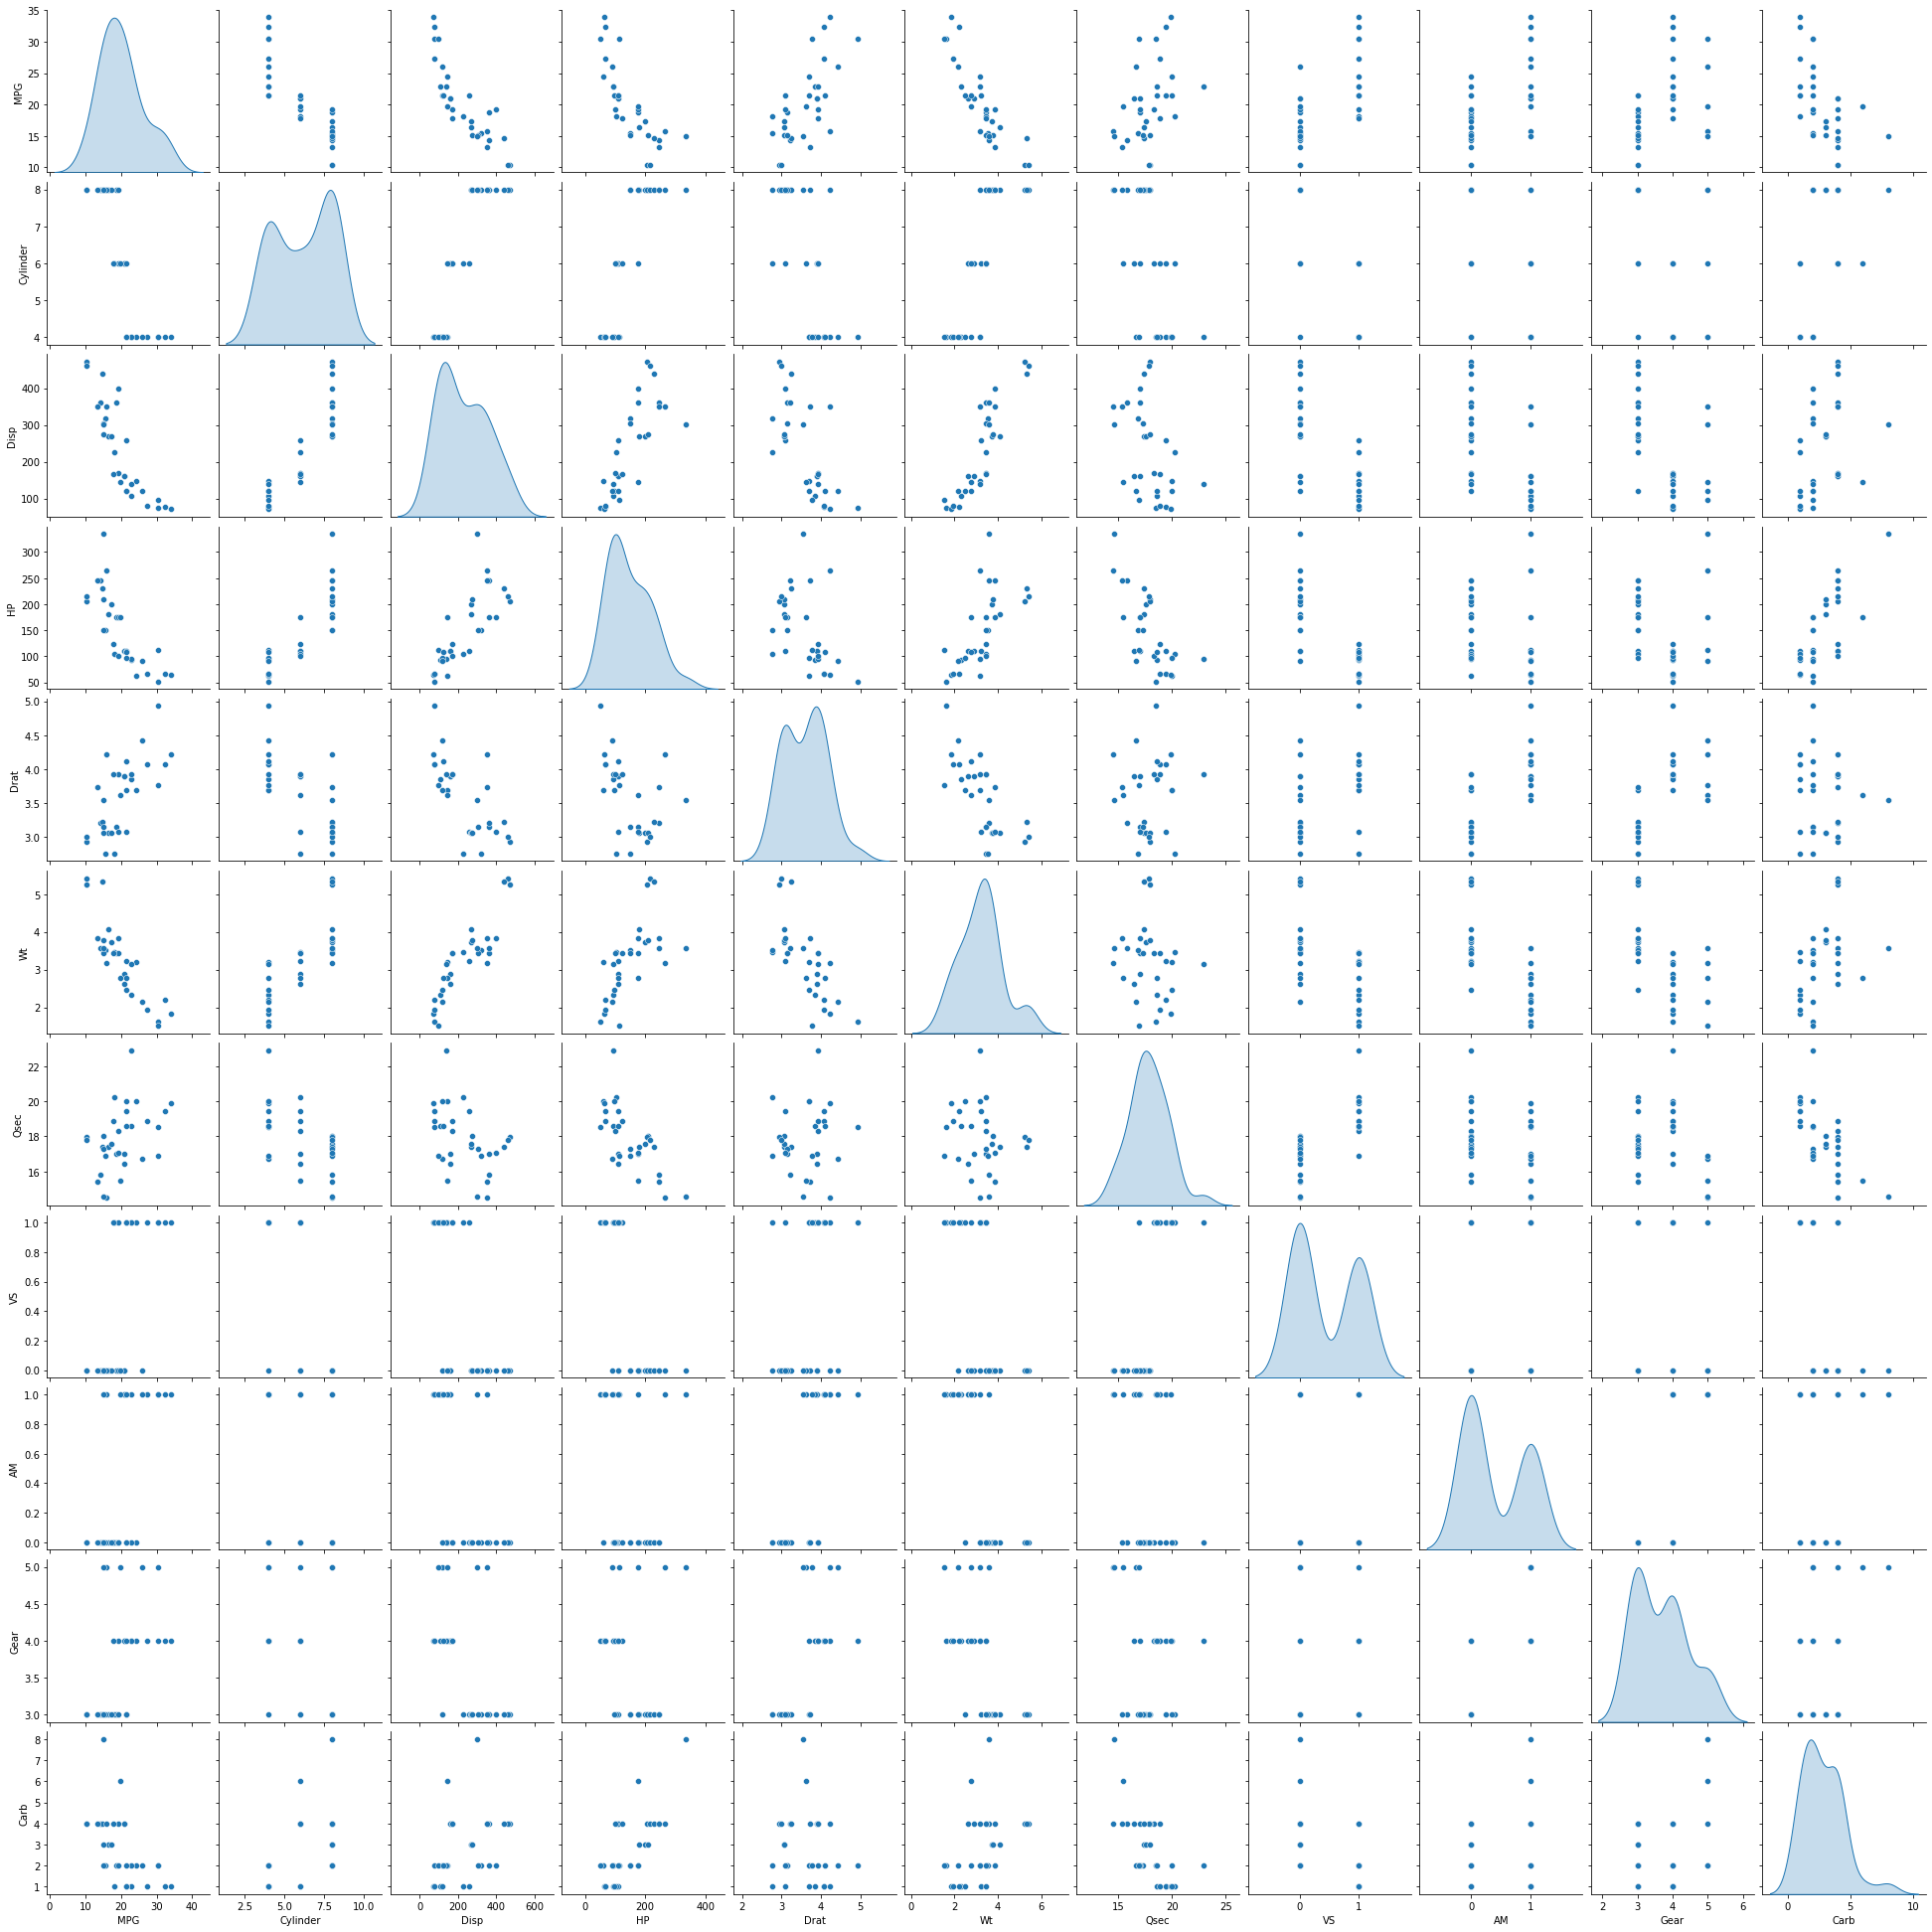

In [25]:
plt.figure(figsize=(20,10))
sns.pairplot(df, diag_kind='kde')
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Class']= le.fit_transform(df['Model '])


In [30]:
df.head()

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb,Class
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,17
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,18
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,4
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,12
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,13


In [32]:
X1= df.iloc[:,1:12]
Y1= df.iloc[:,-1]

In [33]:
#lets try to plot Decision tree to find the feature importance:

from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier(criterion='entropy', random_state=1)
tree.fit(X1, Y1)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [34]:
imp= pd.DataFrame(index=X1.columns, data=tree.feature_importances_, columns=['Imp'] )
imp.sort_values(by='Imp', ascending=False)

,Imp
Disp,0.3250
Qsec,0.3125
Drat,0.1000
Cylinder,0.0625
HP,0.0500
Wt,0.0500
MPG,0.0375
Carb,0.0375
AM,0.0250
VS,0.0000


<AxesSubplot:>

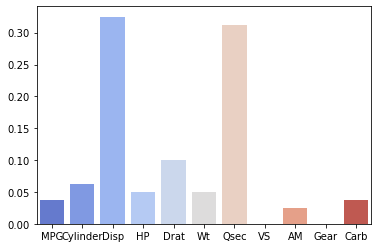

In [35]:
sns.barplot(x=imp.index.tolist(), y=imp.values.ravel(), palette='coolwarm')

#taking only two variable #disp and #qsec as these variable has high importance

In [37]:
X=df[['Disp','Qsec']]
Y= df.iloc[:,0]

In [38]:
from sklearn.cluster import KMeans
#using elbow method to find no of clusters
wcss=[]
for i in range(1,7):
    kmeans= KMeans(n_clusters=i, init='k-means++', random_state=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [39]:
print(wcss)

[475127.2178375, 97893.44308627449, 42756.33400625, 26411.84739255952, 12691.26146746032, 8453.502193650793]


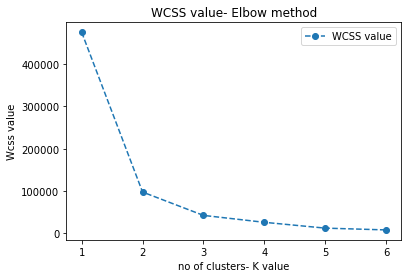

In [40]:
plt.plot(range(1,7), wcss, linestyle='--', marker='o', label='WCSS value')
plt.title('WCSS value- Elbow method')
plt.xlabel('no of clusters- K value')
plt.ylabel('Wcss value')
plt.legend()
plt.show()

In [41]:
#Here we got no of clusters = 2 
kmeans= KMeans(n_clusters=2, random_state=1)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=1)

In [42]:
kmeans.predict(X)

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int32)

In [43]:
#Cluster Center
kmeans.cluster_centers_

array([[128.41764706,  18.64176471],
       [345.98666667,  16.95      ]])

In [45]:
df['cluster']=kmeans.predict(X)
df.sort_values(by='cluster').head()

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb,Class,cluster
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,17,0
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6,7,0
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2,15,0
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2,27,0
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1,9,0


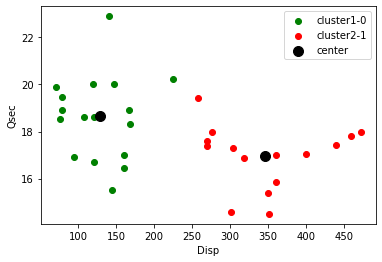

In [49]:
#plotting Cluster plot

plt.scatter(df.loc[df['cluster']==0]['Disp'], df.loc[df['cluster']==0]['Qsec'], c='green', label='cluster1-0')
plt.scatter(df.loc[df['cluster']==1]['Disp'], df.loc[df['cluster']==1]['Qsec'], c='red', label='cluster2-1')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='center')
plt.xlabel('Disp')
plt.ylabel('Qsec')
plt.legend()
plt.show()